This snippet of code presents how the pair distribution of structured parameter space 

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
dtype: object


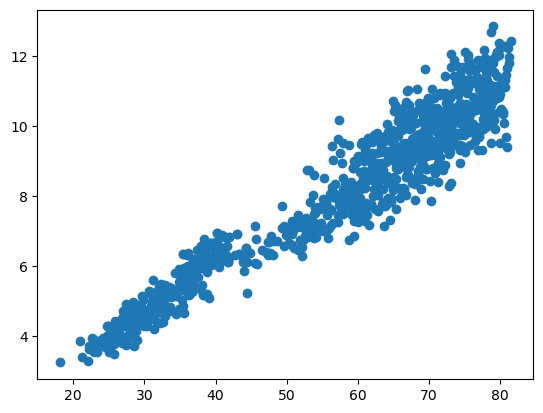

In [28]:
# upload statistic parameter structured data
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import io
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='BQh0o-WiAzXbtvvbB3O9jZ8UY4hDn5C6QMyYhxsUiAl7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'datascienceproject-donotdelete-pr-ykl198n6bmujqz'
object_key = 'stats_hyb.npy'

# load data of type "application/octet-stream" into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
def read_all_body(streaming_body):
    # Use the StreamingBody.read method with a specified amount
    body_data = b''  # Empty byte string to hold data
    while True:
        chunk = streaming_body.read(1024*1024)  # Read in 1MB chunks
        if not chunk:  # If no more data, break the loop
            break
        body_data += chunk
    return body_data

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

np_data = np.load(io.BytesIO(streaming_body_1.read()), allow_pickle=True)
df = pd.DataFrame(np_data)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
df_good = df.iloc[:, :-2]
print(df_good.dtypes)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
